In [1]:
import pandas as pd
import pylab as plt
import seaborn as sns
import numpy as np

In [2]:
salaries=pd.read_csv('../data/salaries_data.csv', encoding ='latin')
testeo=pd.read_csv('../data/testeo.csv',encoding='latin')

### Define variable y and remove it from the DF

In [3]:
y=salaries['salary_in_usd']

In [4]:
salaries2=salaries.drop(columns=['salary_in_usd'])

In [5]:
salaries2.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
495,2022,SE,FT,Data Engineer,100000,USD,US,100,US,M
496,2021,EN,FT,Big Data Engineer,435000,INR,IN,0,CH,L
497,2022,SE,FT,Data Architect,90700,USD,CA,100,CA,M
498,2021,MI,FT,Data Engineer,60000,GBP,GB,100,GB,L
499,2021,EN,FT,Computer Vision Software Engineer,70000,USD,US,100,US,M


In [6]:
salaries2.shape

(500, 10)

### Concatenate salaries and testeo to apply changes to both at the same time

In [7]:
salaries3= pd.concat([salaries2,testeo])

salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,26005,RO,0,US,L


#### Drop salary and salary currency because it tricks the model and the error

In [8]:
salaries3=salaries3.drop(columns=['salary','salary_currency'])

In [9]:
salaries3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 106
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   employee_residence  607 non-null    object
 5   remote_ratio        607 non-null    int64 
 6   company_location    607 non-null    object
 7   company_size        607 non-null    object
dtypes: int64(2), object(6)
memory usage: 42.7+ KB


In [10]:
salaries3.shape

(607, 8)

In [11]:
salaries3=salaries3.reset_index().drop('index', axis=1)

In [12]:
salaries3.tail()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
602,2022,SE,FT,Data Analyst,US,100,US,M
603,2022,SE,FT,Data Architect,US,100,US,M
604,2022,SE,FT,Data Scientist,US,100,US,M
605,2022,EN,FT,Data Analyst,CA,0,CA,M
606,2022,SE,FT,Data Analyst,US,0,US,M


### Examinate the columns and data

In [13]:
salaries3.experience_level.value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [14]:
salaries3['job_title'].replace(['Computer Vision Software Engineer','Head of Data Science' ],['Computer Vision Engineer','Director of Data Science' ], inplace=True)

In [15]:
a=salaries3.groupby('company_location' ).agg({'remote_ratio':'mean'})
a

,remote_ratio
company_location,
AE,66.666667
AS,100.000000
AT,25.000000
AU,83.333333
BE,75.000000
BR,33.333333
CA,75.000000
CH,0.000000
CL,100.000000


In [16]:
# change=['JP', 'PT', 'AT', 'PL','NL', 'PK', 'DK', 'AU', 'BR', 'AE', 'TR', 'LU', 'MX', 'CH', 'IT', 'CZ','RU', 'BE', 'SI', 'NG', 'CN', 'MT', 'HN', 'IL', 'RO', 'SG', 'CO', 'IQ','HR', 'NZ', 'HU', 'IR', 'DZ', 'EE', 'UA', 'CL', 'KE', 'VN', 'IE', 'AS','MD', 'MY']

In [17]:
#lst=[]
#for i in salaries3.company_location:
    
   # if i in change:
       # lst.append('OTHER')
        
    #else:
       # lst.append(i)
        

In [18]:
#salaries3['company_location']=lst

In [19]:
salaries3.company_location.value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
PT      4
AT      4
PL      4
NL      4
PK      3
DK      3
AU      3
BR      3
AE      3
TR      3
LU      3
MX      3
CH      2
IT      2
CZ      2
RU      2
BE      2
SI      2
NG      2
CN      2
MT      1
HN      1
IL      1
RO      1
SG      1
CO      1
IQ      1
HR      1
NZ      1
HU      1
IR      1
DZ      1
EE      1
UA      1
CL      1
KE      1
VN      1
IE      1
AS      1
MD      1
MY      1
Name: company_location, dtype: int64

In [20]:
#pd.set_option('display.max_rows', 500)
#salaries3.groupby(['company_location', 'job_title']).agg({'salary':['mean','max','min','count']})

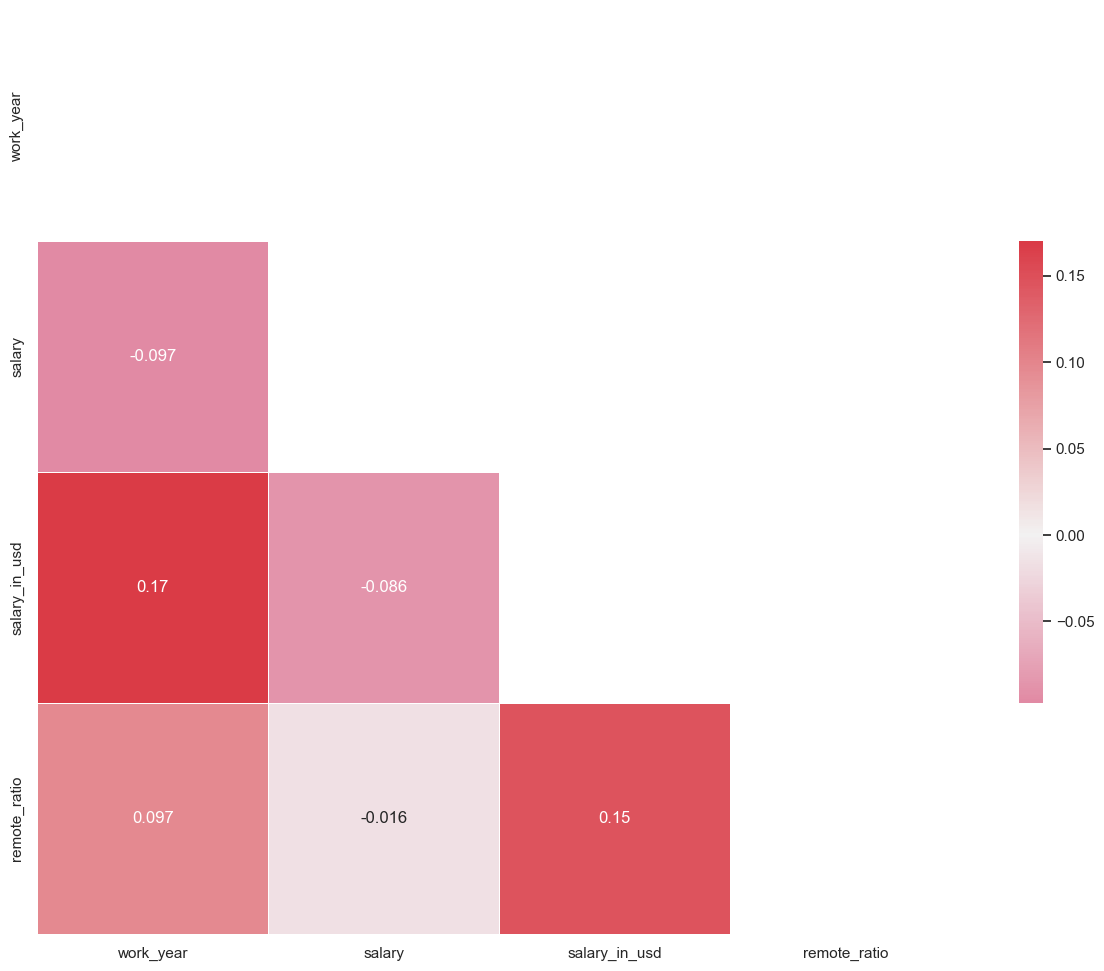

In [21]:
# buscando colinealidad

plt.figure(figsize=(15,12))

sns.set(style='white')

mask=np.triu(np.ones_like(salaries.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(salaries.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [22]:
salaries3.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [23]:
for c in salaries3.columns:       #valores unicos de cada columna
    
    columna=c
    
    print(c,'- valores únicos: ',len(salaries3[columna].unique()))

work_year - valores únicos:  3
experience_level - valores únicos:  4
employment_type - valores únicos:  4
job_title - valores únicos:  48
employee_residence - valores únicos:  57
remote_ratio - valores únicos:  3
company_location - valores únicos:  50
company_size - valores únicos:  3


In [24]:
salaries3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   employee_residence  607 non-null    object
 5   remote_ratio        607 non-null    int64 
 6   company_location    607 non-null    object
 7   company_size        607 non-null    object
dtypes: int64(2), object(6)
memory usage: 38.1+ KB


### Apply get dummies to all the object columns

In [25]:
salaries3=pd.get_dummies(salaries3, columns=['experience_level','employment_type','job_title','company_location','company_size'], drop_first=True)
salaries3.head()

,work_year,employee_residence,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Scientist,...,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
0,2022,US,100,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2022,US,100,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2021,US,100,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2021,US,100,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2021,RO,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


### Apply StandarScaler to normalize the data

In [26]:
from sklearn.preprocessing import StandardScaler
ss=pd.DataFrame(StandardScaler().fit_transform(salaries3._get_numeric_data()),  # standardize numeric columns
         columns=salaries3._get_numeric_data().columns)

In [27]:
ss.tail()

,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Scientist,job_title_Analytics Engineer,...,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
602,0.859977,0.714862,-0.211543,-0.735261,1.080674,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.040622,-0.057496,-0.040622,-0.057496,-0.070476,-0.040622,0.842531,-0.040622,0.92842,-0.397991
603,0.859977,0.714862,-0.211543,-0.735261,1.080674,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.040622,-0.057496,-0.040622,-0.057496,-0.070476,-0.040622,0.842531,-0.040622,0.92842,-0.397991
604,0.859977,0.714862,-0.211543,-0.735261,1.080674,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.040622,-0.057496,-0.040622,-0.057496,-0.070476,-0.040622,0.842531,-0.040622,0.92842,-0.397991
605,0.859977,-1.743615,-0.211543,-0.735261,-0.925348,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.040622,-0.057496,-0.040622,-0.057496,-0.070476,-0.040622,-1.186899,-0.040622,0.92842,-0.397991
606,0.859977,-1.743615,-0.211543,-0.735261,1.080674,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.040622,-0.057496,-0.040622,-0.057496,-0.070476,-0.040622,0.842531,-0.040622,0.92842,-0.397991


### Split the DF after the transformations to Salaries and Testeo 

In [28]:
salaries_nor=ss[0:500]
salaries_nor.tail()

,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Scientist,job_title_Analytics Engineer,...,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
495,0.859977,0.714862,-0.211543,-0.735261,1.080674,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.040622,-0.057496,-0.040622,-0.057496,-0.070476,-0.040622,0.842531,-0.040622,0.928420,-0.397991
496,-0.586023,-1.743615,-0.211543,-0.735261,-0.925348,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.040622,-0.057496,-0.040622,-0.057496,-0.070476,-0.040622,-1.186899,-0.040622,-1.077099,-0.397991
497,0.859977,0.714862,-0.211543,-0.735261,1.080674,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.040622,-0.057496,-0.040622,-0.057496,-0.070476,-0.040622,-1.186899,-0.040622,0.928420,-0.397991
498,-0.586023,0.714862,-0.211543,1.360061,-0.925348,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.040622,-0.057496,-0.040622,-0.057496,-0.070476,-0.040622,-1.186899,-0.040622,-1.077099,-0.397991
499,-0.586023,0.714862,-0.211543,-0.735261,-0.925348,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.040622,-0.057496,-0.040622,-0.057496,-0.070476,-0.040622,0.842531,-0.040622,0.928420,-0.397991


In [29]:
salaries_nor.to_csv('../data/salaries_nor.csv')

In [30]:
testeo_nor=ss[500:]
testeo_nor
testeo_nor=testeo_nor.reset_index().drop('index', axis=1)
testeo_nor.head()


,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Scientist,job_title_Analytics Engineer,...,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
0,-2.032024,-1.743615,-0.211543,-0.735261,1.080674,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.040622,-0.057496,-0.040622,-0.057496,-0.070476,-0.040622,-1.186899,-0.040622,-1.077099,2.512619
1,-2.032024,0.714862,-0.211543,1.360061,-0.925348,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.040622,-0.057496,-0.040622,-0.057496,-0.070476,-0.040622,0.842531,-0.040622,-1.077099,-0.397991
2,-2.032024,0.714862,-0.211543,1.360061,-0.925348,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.040622,-0.057496,-0.040622,-0.057496,-0.070476,-0.040622,0.842531,-0.040622,-1.077099,-0.397991
3,-2.032024,-1.743615,-0.211543,1.360061,-0.925348,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.040622,-0.057496,-0.040622,-0.057496,-0.070476,-0.040622,-1.186899,-0.040622,0.928420,-0.397991
4,-2.032024,0.714862,-0.211543,1.360061,-0.925348,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.040622,-0.057496,-0.040622,-0.057496,-0.070476,-0.040622,-1.186899,-0.040622,-1.077099,-0.397991


In [31]:
testeo_nor.to_csv('../data/testeo_nor.csv')

In [32]:
X=salaries_nor

In [33]:
X.shape, y.shape

((500, 106), (500,))

### Apply the RFR model

In [34]:
from sklearn.model_selection import train_test_split as tts 
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import RandomForestClassifier as RFC
import lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor



from sklearn.model_selection import GridSearchCV        # por fuerza bruta
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 106), (100, 106), (400,), (100,))

In [35]:
X_train, X_test, y_train, y_test = tts(X, y,test_size=0.2,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 106), (100, 106), (400,), (100,))

In [36]:
#%pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 90%|██████████████████████████████████████▌    | 26/29 [01:03<00:02,  1.37it/s]

[16:29:20] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|███████████████████████████████████████████| 29/29 [01:18<00:00,  2.69s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
PassiveAggressiveClassifier,0.05,0.05,None,0.03,0.83
LinearDiscriminantAnalysis,0.02,0.02,None,0.00,0.07
BernoulliNB,0.02,0.02,None,0.01,0.04
RandomForestClassifier,0.02,0.02,None,0.02,0.43
GaussianNB,0.02,0.02,None,0.02,0.06
NearestCentroid,0.02,0.02,None,0.02,0.06
SGDClassifier,0.03,0.01,None,0.01,0.48
LinearSVC,0.01,0.01,None,0.01,13.55
XGBClassifier,0.01,0.01,None,0.01,10.26


In [37]:
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

100%|███████████████████████████████████████████| 42/42 [00:09<00:00,  4.40it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RANSACRegressor,104374616110955166396621783040.00,-7380023361380669052975841280.00,5373701090973076480.00,0.43
TransformedTargetRegressor,36099986390269686710272.00,-2552524290221088964608.00,3160309225217578.50,0.03
LinearRegression,36099986390269686710272.00,-2552524290221088964608.00,3160309225217578.50,0.03
Lars,33004.63,-2332.59,3021738.62,0.05
MLPRegressor,58.65,-3.08,126289.97,0.69
LinearSVR,58.45,-3.06,126076.52,0.02
KernelRidge,55.69,-2.87,123008.41,0.03
GaussianProcessRegressor,28.79,-0.96,87679.56,0.06
SVR,15.37,-0.02,63062.71,0.06


In [38]:
rfr=RFR()

rfr.fit(X_train, y_train)

y_pred=rfr.predict(X_test)

train_score=rfr.score(X_train, y_train)    # R2
test_score=rfr.score(X_test, y_test)

print (train_score, test_score)


0.8382956887143987 0.4136043161477564


In [39]:
y_pred=rfr.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error as mse  

In [41]:
mse(y_test, y_pred, squared=False)

47900.497008733604

#### Test it vs the Testeo

In [42]:
y_pred1=rfr.predict(testeo_nor)

In [43]:
y_pred1

array([162559.41      , 112328.        , 101022.73809524,  70596.085     ,
        21300.25      ,  85831.96      , 157498.16666667,  40898.35      ,
        91988.5       , 145814.77301587,  35263.1225    , 137000.64555556,
       116968.69883333,  34022.84      ,  88235.58      ,  51784.22      ,
        66345.23      , 147523.50793651,  38280.2       ,  87317.5       ,
       142989.81121212,  59278.75333333,  65417.63      , 157985.47278606,
        16171.99      ,  33444.1425    ,  83847.26666667, 205553.95555556,
        48504.1325    ,  67780.15      , 143714.88      , 125666.83531746,
        57662.76      ,  60590.096     ,  42430.68      ,  56800.10916667,
       157985.47278606,  33582.43      ,  63016.69666667, 167358.69166667,
        28210.4525    ,  18993.19      , 111075.5       , 166258.33333333,
        86445.        , 232795.38888889,  94537.69232143,  62134.62666667,
       125666.83531746,  40549.71      , 123563.12904762,  61400.21      ,
       120832.03133333, 1

#### Create a DF from an array

In [51]:
pruebaOK2 = pd.DataFrame(y_pred1, columns = ['salary_in_usd'])
pruebaOK2

,salary_in_usd
0,162559.41
1,112328.00
2,101022.74
3,70596.09
4,21300.25
...,...
102,108290.11
103,228916.73
104,158066.20
105,60227.67


In [52]:
pruebaOK2.to_csv('../data/pruebaOK2.csv',index_label='id')

### Apply SVC method

In [46]:
from sklearn.svm import SVC

svc=SVC(probability=True)

svc.fit(X_train, y_train)

y_prob=svc.predict_proba(X_test)


In [47]:
mse(y_test, y_pred, squared=False)

47900.497008733604

In [48]:
y_pred2=svc.predict(testeo_nor)

In [49]:
prueba4 = pd.DataFrame(y_pred2, columns = ['salary_in_usd'])
prueba4

,salary_in_usd
0,100000
1,170000
2,135000
3,100000
4,100000
...,...
102,135000
103,150000
104,140000
105,135000


In [50]:
#prueba4.to_csv('../data/prueba4.csv',index_label='id')